In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [278]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

In [279]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


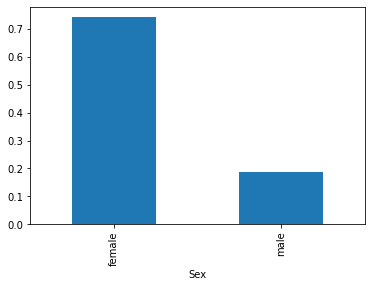

In [280]:
df = train.groupby('Sex').mean()['Survived']
df.plot(kind='bar')
plt.show()

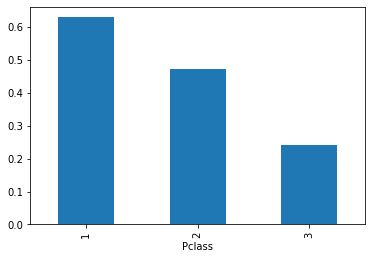

In [281]:
df = train.groupby('Pclass').mean()['Survived']
df.plot(kind='bar')
plt.show()

In [282]:
train.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], inplace=True, axis=1)

In [283]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [284]:
train.dropna(inplace=True)

In [285]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [286]:
for i in train.index:
  if train.loc[i, 'Sex']=='male':
    train.loc[i,'Sex']=1
  else:
    train.loc[i,'Sex']=0

In [287]:
target = np.ravel(train.Survived)

In [288]:
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)

In [289]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train, target, test_size=0.2, random_state=42)

In [290]:
train_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
328,3.0,0.0,31.0,1.0,1.0,20.5250
73,3.0,1.0,26.0,1.0,0.0,14.4542
253,3.0,1.0,30.0,1.0,0.0,16.1000
719,3.0,1.0,33.0,0.0,0.0,7.7750
666,2.0,1.0,25.0,0.0,0.0,13.0000


In [291]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 328 to 130
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  571 non-null    float64
 1   Sex     571 non-null    float64
 2   Age     571 non-null    float64
 3   SibSp   571 non-null    float64
 4   Parch   571 non-null    float64
 5   Fare    571 non-null    float64
dtypes: float64(6)
memory usage: 31.2 KB


In [292]:
model=keras.Sequential()
model.add(keras.layers.Dense(32, activation='relu', input_shape=(6,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [293]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=200, verbose=1)

Train on 571 samples
Epoch 1/200
571/571 [==============================] - 0s 709us/sample - loss: 1.3560 - accuracy: 0.5902
Epoch 2/200
571/571 [==============================] - 0s 51us/sample - loss: 0.6843 - accuracy: 0.5902
Epoch 3/200
571/571 [==============================] - 0s 53us/sample - loss: 0.6312 - accuracy: 0.6480
Epoch 4/200
571/571 [==============================] - 0s 53us/sample - loss: 0.6084 - accuracy: 0.7005
Epoch 5/200
571/571 [==============================] - 0s 52us/sample - loss: 0.5981 - accuracy: 0.7058
Epoch 6/200
571/571 [==============================] - 0s 51us/sample - loss: 0.5958 - accuracy: 0.7023
Epoch 7/200
571/571 [==============================] - 0s 52us/sample - loss: 0.5938 - accuracy: 0.7023
Epoch 8/200
571/571 [==============================] - 0s 50us/sample - loss: 0.5905 - accuracy: 0.7023
Epoch 9/200
571/571 [==============================] - 0s 48us/sample - loss: 0.5907 - accuracy: 0.6988
Epoch 10/200
571/571 [====================

In [294]:
model.evaluate(val_scaled,val_target)

143/143 [==============================] - 0s 773us/sample - loss: 0.5570 - accuracy: 0.8112


[0.5570177506733608, 0.8111888]

In [295]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [296]:
test.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], inplace=True, axis=1)
test.dropna(inplace=True)
for i in test.index:
  if test.loc[i, 'Sex']=='male':
    test.loc[i,'Sex']=1
  else:
    test.loc[i,'Sex']=0
test = test.astype(float)

In [297]:
model.predict(test, verbose=1)

331/331 [==============================] - 0s 169us/sample


array([[7.17892647e-02],
       [8.43809545e-02],
       [2.61280239e-02],
       [9.10091698e-02],
       [3.79980862e-01],
       [2.65556514e-01],
       [5.01907647e-01],
       [7.18085170e-02],
       [7.11906314e-01],
       [7.36640096e-02],
       [9.47668850e-02],
       [9.80718613e-01],
       [1.28175616e-02],
       [9.69609082e-01],
       [9.03895319e-01],
       [1.08202070e-01],
       [1.04924291e-01],
       [1.80105895e-01],
       [3.11188281e-01],
       [2.40827560e-01],
       [4.31964487e-01],
       [4.34800684e-01],
       [9.56256747e-01],
       [8.62005353e-03],
       [9.61157382e-01],
       [1.01889580e-01],
       [2.29221731e-01],
       [1.03559792e-02],
       [9.60988998e-02],
       [2.26696253e-01],
       [4.22490537e-01],
       [1.19067192e-01],
       [6.66774750e-01],
       [7.17176795e-02],
       [4.08011079e-02],
       [5.20118177e-02],
       [7.07327545e-01],
       [9.49653149e-01],
       [9.75446701e-02],
       [9.46370959e-02],


In [298]:
prediction = list(model.predict(test))
submission = pd.DataFrame({
    "Pclass": test["Pclass"],
    "Sex" : test["Sex"],
    "Age" : test["Age"],
    "Parch" : test["Parch"],
    "Fare" : test["Fare"],
    "Survived" : prediction
})
submission.to_csv('submission.csv', index=False)